# Цифровая обработка сигналов - Лекция 13

# Тема: Оконное преобразование Фурье. Спектрограмма и мел-спектрограмма

Обычное преобразование Фурье позволяет перейти из временной области в частотную, и таким образом получить информацию, какие частоты представлены в сигнале. Однако в частотной области *полностью теряется информация о временной составляющей сигнала*. Гляда на спектр сигнала, мы видим все составляющие его частоты, но мы не можем узнать, в какой момент времени те или иные частоты появились в сигнале. 

Что делать, если мы хотим знать не только частоты сигнала, но и время их появления? Для этой цели было придумано оконное преобразование Фурье.

**Оконное преобразование Фурье** (Short-Time Fourier Trasnfrom, STFT) - это разновидность преобразования Фурье с использование оконной функции. Оконное преобразование позволяет получить информацию о том, какие частоты *в какой момент времени* присутствуют в сигнале.

Иногда это преобразование также обозначается как *STFFT (Short-Time **Fast** Fourier Transform)*, так как для его реализации используется именно быстрое преобразование Фурье. Быстрое преобразование Фурье применяется локально к небольшим сегментами сигнала. 

Чтобы получить отдельные сегменты сигнала, исходный сигнал перемножается с оконной функцией:
$$x_w(t) = x(t) \cdot w(t) \tag{13.1}$$
где $x(t)$ это исходный сигнал, а $w(t)$ - оконная функция.

Таким образом, если мы поделили сигнал с помощью оконной функции на $m$ сегментов, мы $m$ раз применяем быстрое преобразование Фурье, отдельно для каждого из этих сегментов.

Непрерывное оконное преобразование Фурье определяется следующим образом:
$$ F(\tau, \omega) = \int\limits_{-\infty}^\infty f(\tau) W(t - \tau) e^{-j\omega\tau}\mathrm{d\tau} \tag{13.2}$$
Здесь $W(t - \tau)$ - некоторая оконная функция.

Дискретное оконное преобразование Фурье описывается аналогично.
$$F(m, \omega) = \sum_{n=-\infty}^{\infty}x_n w_{n - m}e^{-j\omega n} \tag{13.3}$$

Оконное преобразование порождает коэффициенты Фурье для $\omega$-ой частоты в $m$-ом фрейме.

Оконное преобразование Фурье позволяет получить важно представление сигнала -  *спектрограмму*.

**Спектрограмма** - это график, показывающий зависимость плотности мощности сигнала от времени и частоты:

$$ E(\tau, \omega) = |F(\tau, \omega)|^2 \tag{13.4}$$

где $F(\tau, \omega)$ - оконное преобразование Фурье.

Для примера визуализируем спектрограмму сигнала с *линейной частотной модуляцией (ЛЧМ)*, частота которого изменяется линейно от 1 до 400 Гц.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

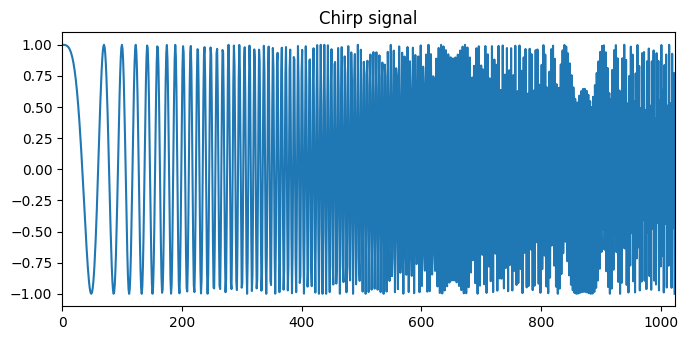

In [2]:
from scipy.signal import chirp

N = 1024
time = np.linspace(0, 1, N)
chirp_sig = chirp(time, f0=1, t1=1, f1=400)

fig = plt.figure(figsize=(7, 3.5)) 
plt.title("Chirp signal")
plt.plot(chirp_sig); 
plt.xlim(0, N)
plt.tight_layout()

Для получения изображения спектрограммы можно использовать встроенную matplotlib функцию `specgram`. Функция не только считает коэффициенты оконного преобразования Фурье для заданного сигнала, но и автоматически строит график спектрограммы.

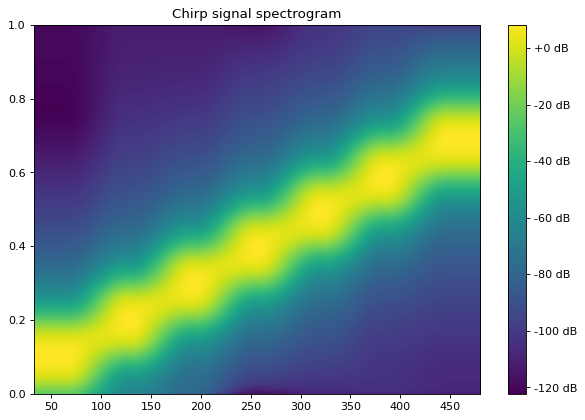

In [3]:
fig = plt.figure(figsize=(9, 6), dpi=80)
plt.specgram(chirp_sig)
plt.colorbar(format='%+2.0f dB');
plt.title('Chirp signal spectrogram')
plt.show()

Как видно из графика, мы можем наблюдать зависимость сигнала, *как от времени, так и от частоты*.

# Параметры преобразования
Оконное преобразование Фурье зависит от ряда параметров, настраивая которые, можно менять результат. Рассмотрим два таких параметра: ширина окна и размер перекрытия окон.

### Ширина окна

Измеряется в количестве семплов сигнала.

Ширина окна является важным параметром, так как влияет на *разрешение* преобразованного сигнала. Чтобы понять, что это обозначает, нужно подробнее рассмотреть фундаментальное ограничение, которое есть у оконного преобразования Фурье - *time-frequency trade-off*.

### Time-Frequency trade-off

Хотя оконное преобразование Фурье и позволяет получать информацию о частотах и времени их появления в сигнале одновременно, его возможности ограничены фундаментальным принципом неопределенности Гейзенберга. Согласно этому принципу, чем точнее измеряется одна характеристика, тем менее точно мы можем измерить вторую.

Для примера рассмотрим спектрограмму косинусоиды с фиксированной частотой.

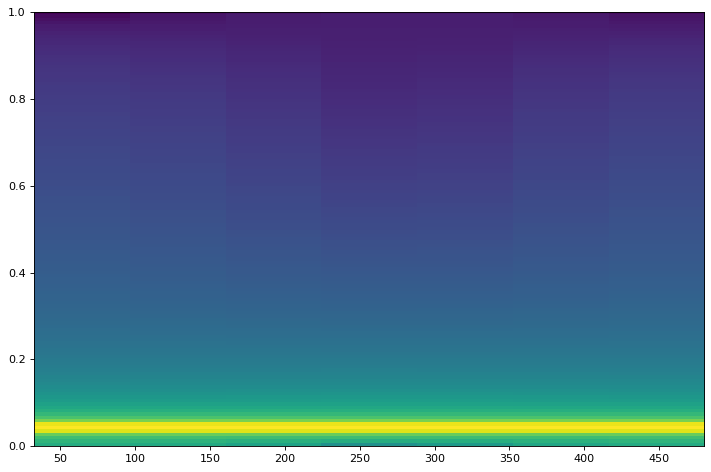

In [4]:
N = 1024
time = np.arange(N)

# Cosine wave
period = 50
cosine_wave = np.cos(2 * np.pi / period * time)

fig = plt.figure(figsize=(9, 6), dpi=80)
plt.specgram(cosine_wave)
plt.tight_layout()

##### Как видно на спектрограмме, частота здесь представлена не одним конкретным значением, а промежутком значений.

Таким образом, оконное преобразования Фурье неизбежно несет потери информации: мы можем получить *высокое разрешений либо по времени, либо по частоте*. Менять разрешение мы можем, варьируя ширину окна.

Допустим, мы выберем достаточно широкое окно, тогда в него попадет большее количество семплов. Мы сможем получить высокое разрешение по частоте, но меньшее по времени, так как полученные коэффициенты будут относиться к длинному временному отрезку.

Для узкого окна ситуация прямо противоположная: мы получаем высокое разрешение по времени, так как считаем коэффициенты на небольшом временном промежутке, но низкое по частоте.

С шириной окна связано еще одно ограничение оконного преобразования Фурье: его *разрешение является фиксированным на всей временной и частотной области* и зависит от ширины окна.

Рассмотрим на примере, как размер окна влияет на вид спектрограммы сигнала.

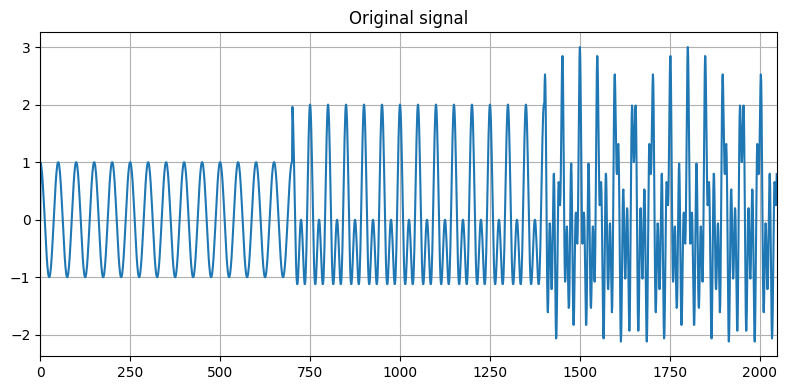

In [5]:
N = 2048
time = np.arange(N)

timestamps = [0, 700, 1400]
periods = [50, 25, 12]
signal = np.zeros(N)
for timestamp, period in zip(timestamps, periods):
    mask = (time > timestamp) & 1
    cosine = np.cos(2 * np.pi / period * time) * mask
    signal += cosine

# Plot original signal 
fig = plt.figure(figsize=(8, 4))
plt.title("Original signal")
plt.plot(signal) 
plt.xlim(0, N)
plt.grid()
plt.tight_layout()

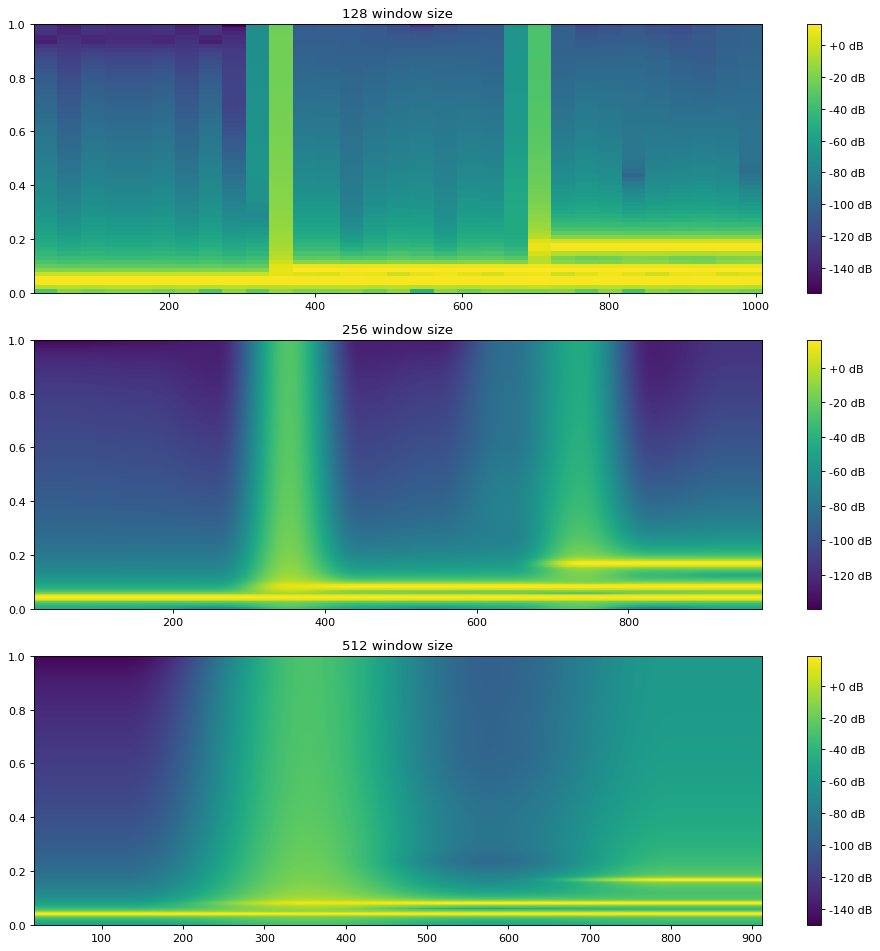

In [6]:
fig = plt.figure(figsize=(12, 12), dpi=80)

# Window size in samples
windows = [128, 256, 512]
for i, window in enumerate(windows):
    ax = plt.subplot(3, 1, i+1)
    spec = plt.specgram(signal, NFFT=window, noverlap=64)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{window} window size')
plt.tight_layout()   

Как видно на графиках выше, чем шире окно, тем большую точность по частоте мы можем получить (горизонтальные полосы становятся уже), однако точность по времени теряется: становится все труднее однозначно определить время возникновения частот в сигнале.

Следующий важный параметр: размер перекрытия окон.

### Размер перекрытия (наложения) окон

Оконная функция сглаживает сигнал на концах, позволяя избежать эффекта <u>растекания спектра</u>, который наблюдается, когда в сигнале присутствует нецелое количество периодов. Однако возникает побочный эффект - сглаживание сигнала приводит к потере информации.

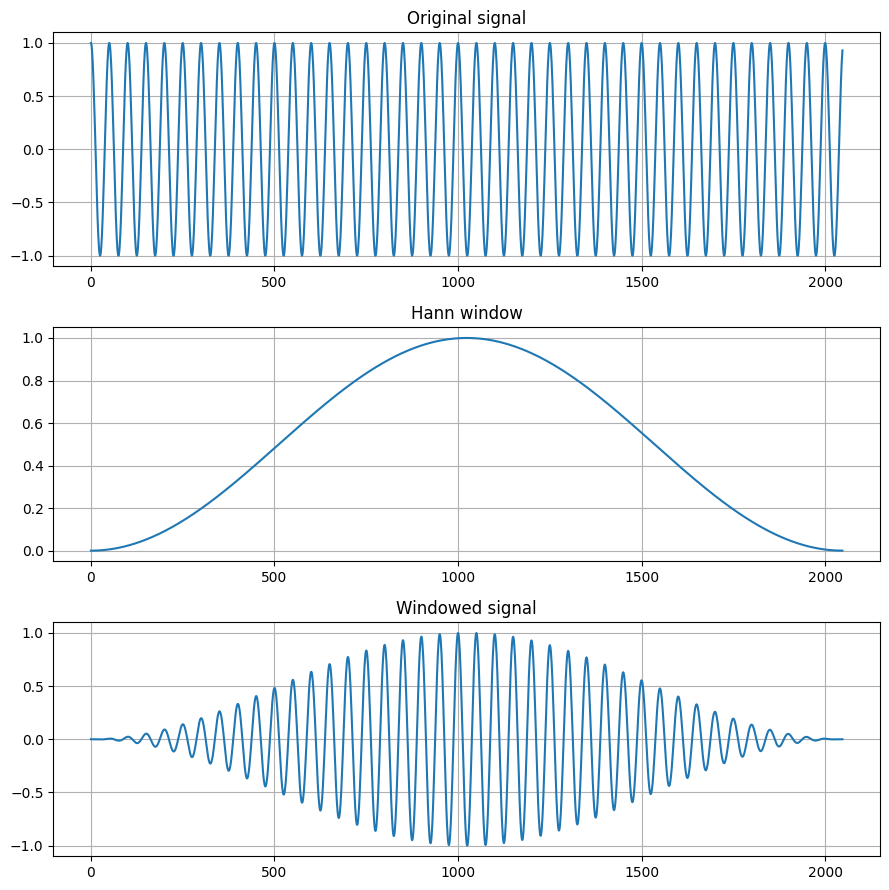

In [7]:
from scipy.signal import hann

N = 2048
time = np.arange(N)
window = hann(N)
period = 50
cosine = np.cos(2 * np.pi / period * time)

fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 9))
ax1.set_title("Original signal")
ax1.plot(cosine)
ax1.grid()
ax2.set_title("Hann window")
ax2.plot(window)
ax2.grid()
ax3.set_title("Windowed signal")
ax3.plot(cosine * window)
ax3.grid()

plt.tight_layout()

Как видно из графика выше, сигнал сильно сглаживается на концах оконной функцией, часть информации о сигнале теряется. Чтобы не допустить больших потерь информации из-за сглаживания, используют **перекрывающиеся окна**.

Перекрытие между окнами тоже является параметром преобразования. Если перекрытие маленькое, график спектрограммы получается очень резким; в случае, если перекрытие между окнами большое, график становится более сглаженным, но требуется больше времени на вычисление спектрограммы.

Рассмотрим на примере.

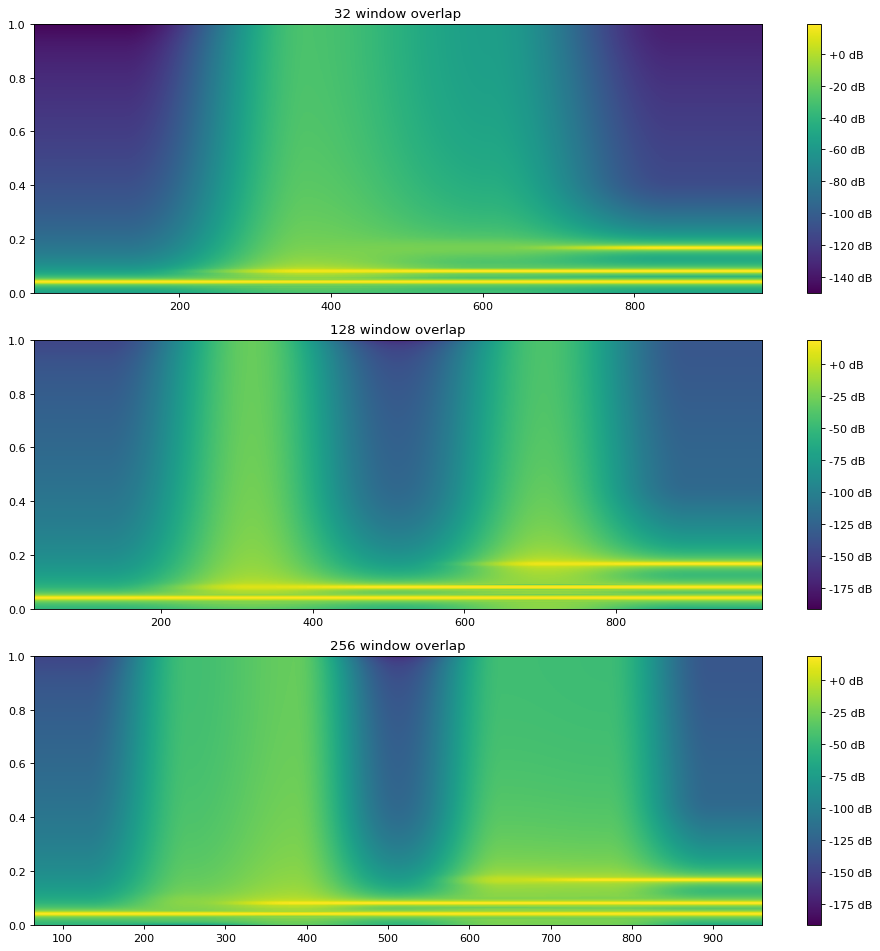

In [8]:
fig = plt.figure(figsize=(12, 12), dpi=80)

# Overlap size in samples
overlaps = [32, 128, 256]
for i, overlap in enumerate(overlaps):
    plt.subplot(3, 1, i+1)
    spec = plt.specgram(signal, NFFT=512, noverlap=overlap)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{overlap} window overlap')
plt.tight_layout()  

____

# Мел-шкала и мел-спектрограмма

**Мел-шкала** были специально разработаны для извлечения признаков из звуковых сигналов - ее идея основана на психоакустических особенностях восприятия высоты звука человеком. Прежде чем идти дальше, определимся, что именно называют *высотой звука*.

Высота звука тесно связана с его частотой, но не всегда эквивалентна ей. Дело в том, что в жизни мы имеем дело со сложными, составныи сигналами, в которых одновременно присутствует несколько осциллирующих компонент с разной частотой. Высотой звука называется частота его **основного тона**, то есть периодической составляющей с самой низкой частотой в сигнале.

Было замечено, что люди воспринимают высоту звука *нелинейно*: на низких частотах разница в высоте звука ощущается более ясно, чем на высоких. Продемонстрируем это на примере.

## Психоакустический эксперимент

Прослушаем несколько аудиосигналов с разной высотой: 
- две низкие ноты

`Ля второй октавы = 110 Hz
Соль-диез третьей октавы = 207 Hz`

- и две высокие ноты

`Соль шестой октавы =  1568 Hz
Соль-диез шестой октавы = 1661 Hz`

In [9]:
from IPython.display import Audio

### Низкие ноты:

In [10]:
sr = 10000
duration = 1
f1 = 110
f2 = 207

# Generating sinusoids with certain frequencies (pure tones)
A2 = np.sin(2 * np.pi * f1 * np.arange(sr * duration) / sr)
Gis3 = np.sin(2 * np.pi * f2 * np.arange(sr * duration) / sr)

print('Ля 2 октавы (110 Гц):')
display(Audio(A2, rate=sr))
print('Соль-диез 3 октавы (207 Гц):')
display(Audio(Gis3, rate=sr))

Ля 2 октавы (110 Гц):


Соль-диез 3 октавы (207 Гц):


### Высокие ноты:

In [11]:
f3 = 1568
f4 = 1661
G6 = np.sin(2 * np.pi * f3 * np.arange(sr * duration) / sr)
Gis6 = np.sin(2 * np.pi * f4 * np.arange(sr * duration) / sr)

print('Соль 6 октавы (1568 Гц):')
display(Audio(G6, rate=sr))
print('Соль-диез 6 октавы (1661 Гц):')
display(Audio(Gis6, rate=sr))

Соль 6 октавы (1568 Гц):


Соль-диез 6 октавы (1661 Гц):


Хотя разница в частотах для первой и второй пары нот примерно одинакова (~100 Гц), легко услышать, что воспринмается она совершенно по-разному. *Кажется, будто интервал между первыми двумя нотами значительно больше*, чем между вторыми двумя.

Следовательно, обычная линейная шкала частот является неинформативной для отображения восприятия звука человеческим ухом. На самом деле шкала психоакустического восприятия звука человеком является *логарифмической*. Как отобразить частоты в соответствии с тем, как их воспринимает человек, чтобы одинаковое расстояние между делениями шкалы обозначало одинаковое восприятие человеческим ухом? Для этой цели была придумана <u>мел-шкала</u>. 

**Мел** (от слова мелодия) - это психофизическая единица высоты звука. Мел-шкала и формула перехода от Герц к мелам были выведены эмпирически, посредством проведения большого количества психоакустических тестот наподобие представленного выше.

Формула перехода от частоты в Герцах до частоты в Мелах:
$$ m = 2595 \cdot \log{(1 + \frac{f}{700})}\tag{13.5}$$
Функция обратного перехода от Мелов к Герцам:
$$ f = 700\cdot(10^{\frac{m}{2595}} - 1) \tag{13.6}$$

Рассмотрим, как выглядит график соотношения частоты в Герцах к частоте в Мелах.

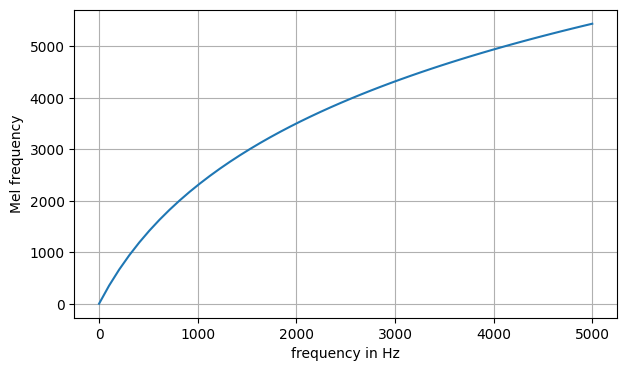

In [12]:
hz = np.linspace(0, 5000)
mel = 2595 * np.log(1 + hz/700)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(hz, mel)
ax.grid()
plt.xlabel('frequency in Hz')
plt.ylabel('Mel frequency')
plt.show()

## Мел-спектрограмма

Мел-спектрограмма похожа на обычную спектрограмму с одним изменением - вместо частотной шкалы в Герцах используется мел-шкала.
Алгоритм вычисления мел-спектрограммы следующий:
1. Применить к сигналу оконное преобразование Фурье.
2. Преобразовать амплитуду в децибелы. Дело в том, что восприятие человеком громкости звука *тоже нелинейно*: ощущение громкости пропорционально логарифму интенсивности звука, поэтому шкала в децибелах оказывается более информативной.
3. Преобразовать частоту в мелы, применив к спектрограмме банк мел-фильтров.

**Банк мел-фильтров** можно построить следующим образом:
1. Перевести максимальную и минимальную частоту в мелы.
2. Создать $n$ равномерно расположенных точек (каждая точка - середина соответствующей мел-полосы).
3. Преобразовать соответствующее значение частоты каждой точки обратно в Герцы и округлить до ближайшего отсчета частоты.
4. На полученных частотных полосах построить треугольные фильтры.

Построим банк мел-фильтров, используя Python библиотеку для работы с аудиосигналами - `librosa`. В этой библиотеке представлено много инструментов для обработки и анализа звука, включая банк мел-фильтров `filters.mel`, позволяющий получать мел-спектрограмму сигнала.

In [13]:
import librosa
import librosa.display

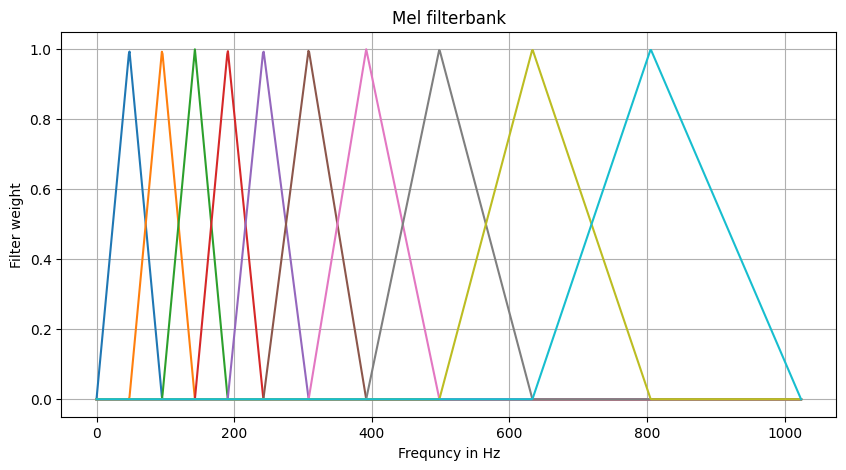

In [14]:
n_mel_bands = 10

# Calculate filterbank coefficients
fig, ax = plt.subplots(figsize=(10, 5))
mels = librosa.filters.mel(n_fft=2048, sr=10000, n_mels=n_mel_bands, fmin=0.0, fmax=None, htk=False, norm=None)
mels = mels.T

ax.plot(mels)
ax.grid()
plt.title('Mel filterbank')
plt.xlabel('Frequncy in Hz')
plt.ylabel('Filter weight')
plt.show()

На графике выше представлено 10 треугольных мел-фильтров для 10 различных частотных полос; по оси $X$ отложена частота в Герцах, по оси $Y$ - вес фильтра в диапазоне от 0 до 1. Как можно заметить, фильтры пересекаются, левая и правая границы каждой частотной полосы (каждого треугольника) являются центрами предыдущей и следующей полос соответственно. Для каждой полосы на середине коэффициент пропускания будет максимальным (вес фильтра равен 1), а на граничных значения, соответственно, минимальным (вес равен 0).

Теперь построим мел-спектрограмму аудиосигнала.

In [15]:
# Download an example file
audio, sr = librosa.load(librosa.util.example('trumpet'))
print('Trumpet solo')
Audio(audio, rate=sr)

Trumpet solo


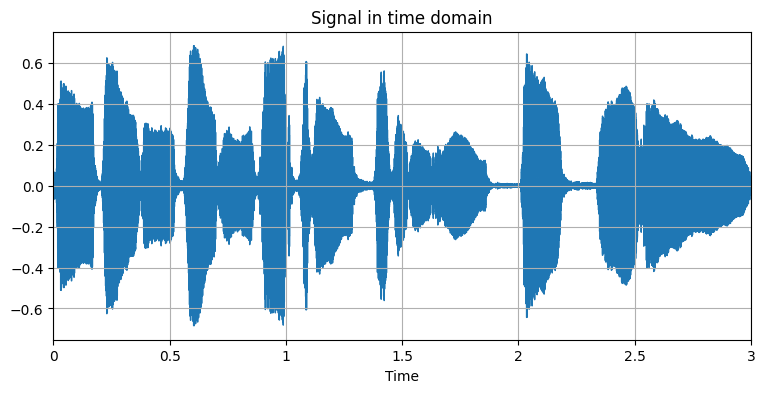

In [16]:
plt.figure(figsize=(9, 4))
plt.title('Signal in time domain')
librosa.display.waveshow(audio, sr=sr)
plt.xlim((0, 3))
plt.grid()

Метод `feature.melspectrogram` позволяет автоматически вычислить мел-спектрограмму сигнала с заданными параметрами без необходимости применять банк мел-фильтров к спектрограмме сигнала вручную.

In [17]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=8192, n_mels=90)

Так как восприятие амплитуды также является логарифмическим, для большей информативности следует перевести амплитуду в децибелы и получить *логарифмическую мел-спектрограмму*. Для этого в librosa есть метод `power_to_db`.

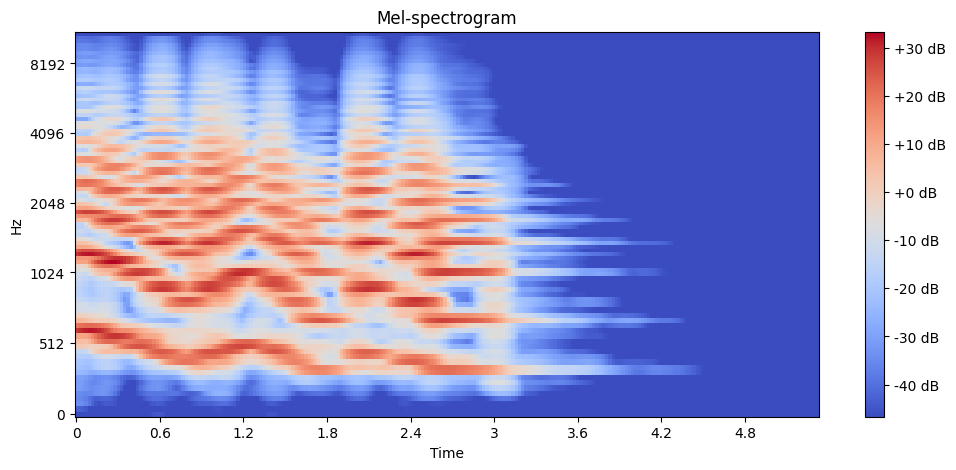

In [18]:
log_mel_spec = librosa.power_to_db(mel_spectrogram)

# Plot mel-spectrogram
plt.figure(figsize=(12, 5))
librosa.display.specshow(log_mel_spec,
                         x_axis='time',
                         y_axis='mel',
                         sr=sr)
plt.colorbar(format='%+2.0f dB');
plt.title('Mel-spectrogram')
plt.show()